## Tool Installation

In [1]:
!pip install bioinfokit

## Data Science Tools

In [17]:
import bioinfokit as bik
from bioinfokit.analys import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread

## GEX Matrix import and cell filtering

#### Add ST1 DBEC

In [18]:
AIRR = pd.read_csv("RhapTCRBCRdemo_VDJ_Dominant_Contigs_AIRR.tsv",
                 sep='\t',
                 low_memory=False)
AIRR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,3091,T_CD4_memory,False,TRB,3091_TRB_1,1506,3,GACGGCAAGACGGCGGAGGAGGAAGGGGGGCTTTTCTTCAAAGCAG...,507,DGKTAEEEGGLFFKAAMGIRLLCRVAFCFLAVGLVDVKVTQSSRYL...,...,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,ATGGACCATGAAAAT,MDHEN,TCATATGATGTTAAAATG,SYDVKM,GCCAGCAGTCTTCAGGCGAGCCCTTATGGCTACACC,ASSLQASPYGYT
1,3517,T_CD4_memory,True,TRA,3517_TRA_1,2206,7,GCGATAGCACCACACAAGAGCATGAAAAATTATGCGTAGGAGGGAG...,603,AIAPHKSMKNYA*EGGGPT*SVYLLQTPMAQELGMQCQARGILQQM...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTCGGGAGTGGGACCAGACTGCTGGTCAGGCCT,FGSGTRLLVRP,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTTCCCGAGGCAAGAGCAGCTATAAATTGATC,ASRGKSSYKLI
2,3517,T_CD4_memory,True,TRB,3517_TRB_1,1822,13,GGCGAGGAGCTATAAATGGCGGAAGCACCACACACGAGCATAGAAG...,573,GEEL*MAEAPHTSIEV*A*EGGGAVVTTLPREGGVRPSRKMLLLLL...,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYIC,TTCGGGCCAGGCACGCGGCTCCTGGTGCTC,FGPGTRLLVL,GACTTTCAGGCCACAACT,DFQATT,TCCAATGAGGGCTCCAAGGCC,SNEGSKA,AGTGCTAGACTGCGGGATGGGGGAGAGACCCAGTAC,SARLRDGGETQY
3,3921,T_CD4_naive,True,TRA,3921_TRA_1,640,6,GAAGTAGGGATGGGGAGATAGGGAGCTGTGATGAGAACAAGAGGTC...,714,SRDGEIGSCDENKRSEHIQTP*GKAFL*PFLKPFKGRDLSSLTCLL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGATCAGGGACCAGACTCAGCATCCGGCCA,WIRDQTQHPA,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGTCCCACCCCTGCACGGAGTACAGCAGTGCTTCCAAGATAATC,AVPPLHGVQQCFQDN
4,3921,T_CD4_naive,True,TRB,3921_TRB_1,250,5,CCGCAAAAACTATTAGGCGTAGTAGGAAGGAGCAGCTCTTCAGAAG...,590,AKTIRRSRKEQLFRSAGKRRMCIETMTSDPDLVKLPSCPDPAMGTR...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTTGGCAGTGGAACCCAGCTCTCTGTCTTG,FGSGTQLSVL,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCTTATCTGGCGGGGACGGGGAACTGTTT,ASSLSGGDGELF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,14040219,B,True,IGH,14040219_IGH_1,818,9,GGGGAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTT...,631,GALREVP*PWIPRHFHLVISTEHRGLTMELGLCWVFLVAILEGVQC...,...,TTCTACGTAGACTCTGTGAAGGGCCGATTCTCCATCTCCAGAGACA...,FYVDSVKGRFSISRDNTKNSLYLQMNSLRAEDTALYYC,TGGGGCCAAGGGACCATCGTCACCGTCTCTTCA,WGQGTIVTVSS,GGATTCAGCGTCAGTAGTTATGAG,GFSVSSYE,ATTGGTACTAGTAGTCATAGCGCA,IGTSSHSA,GCGAGAGAAATGAGGGGGTCTGGGGATGCTTTTGATCTC,AREMRGSGDAFDL
8874,14040219,B,True,IGL,14040219_IGL_1,1250,20,CGAGGACCACCACCAACACTGGTGAAGCAGTATGCGGCCTAGGTAT...,556,RTTTNTGEAVCGLGMGGGHKRQRSRDVSTMAWALLLLTLLTQDTGS...,...,AAGCGGCCCTCAGGGGTTTCTAATCGCTTCTCTGGCTCCAAGTCTG...,KRPSGVSNRFSGSKSGNTASLTISGLQTEDEADYYC,TTCGCAACTGGGACCAAGGTCGCCGTCCTA,FATGTKVAVL,ACCAAAGATATTGGCCTTTATGACACT,TKDIGLYDT,GAGGTCACT,EVT,TGCTCATATGTAGGTAGTGCCACTTATGTC,CSYVGSATYV
8875,14043271,B,True,IGH,14043271_IGH_1,805,6,GGGGATCACATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGG...,590,GSHNNHIPPLKKPLGAQLITMDWTWRFLFVVAAATGVQSQVRLVQS...,...,AACTACGCACAGATGTTCCAGGGCAGAGTCACCATTACCGCGGACA...,NYAQMFQGRVTITADKSTSTAYMELTSLRSEDTAVYYC,TGGCCAAGGGACAATGGTCACCGTCTCTTCA,WPRDNGHRLF,GGAGGCAGCTTCAGCAGTGATCTT,GGSFSSDL,ATCATCCCTCTCTTTCATACAGCA,IIPLFHTA,GCGAGAGTCGGCTTCGTGATTACGTTGGGGGGGTTTAGGGGTGCTT...,ARVGFVITLGGFRGAFDI
8876,14043271,B,True,IGK,14043271_IGK_1,1716,23,CCCTCTCGCAGCCGTCCGAGCGCAGGGCGGACCCCCGCCCCACGAA...,539,PSRSRPSAGRTPAPRSAHTEAE*VGGEELLS*DPEGTMETPAQLLF...,...,AACAGGGCCACTGGCATCCCAGACAGGTTCAGTGGCAGTGGGTCTG...,NRATGIPDRFSGSGSGTDFTLTISRLEPEDFAVYYC,TTCGGCCAAGGGACCAAGGTGGAAATCAAA,FGQGTKVEIK,CAGAGTGTTAGCAGCAGCTAC,QSVSSSY,GGTGCCTCC,GAS,CAGCAGTATGGTAGCTCACCTACGACG,QQYGSSPTT


#### Add ST2 DBEC

In [19]:
Barcodes = pd.read_csv("./RhapTCRBCRdemo_SampleTag05_hs_RSEC_MolsPerCell_MEX/barcodes.tsv.gz", header=None, sep='\t')
Barcodes = (Barcodes.iloc[:, 0])
Features = pd.read_csv("./RhapTCRBCRdemo_SampleTag05_hs_RSEC_MolsPerCell_MEX/features.tsv.gz", header=None, sep='\t')
Features = Features.iloc[:, 0]
Matrix = mmread("./RhapTCRBCRdemo_SampleTag05_hs_RSEC_MolsPerCell_MEX/matrix.mtx.gz")
Matrix = Matrix.todense()
ST = pd.DataFrame(Matrix, columns=Barcodes)
ST.set_index(Features, inplace=True)
ST = ST.T
ST.index.names = ['Cell_Index']
ST.reset_index(inplace=True)
ST_1 = ST
ST_1 = ST_1.assign(Sample='1') # Sample name
ST_1

,Cell_Index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Sample
0,3921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6221,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6620,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,7685,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,14032224,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3218,14035652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3219,14040973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3220,14042969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
Barcodes = pd.read_csv("./RhapTCRBCRdemo_SampleTag06_hs_RSEC_MolsPerCell_MEX/barcodes.tsv.gz", header=None, sep='\t')
Barcodes = (Barcodes.iloc[:, 0])
Features = pd.read_csv("./RhapTCRBCRdemo_SampleTag06_hs_RSEC_MolsPerCell_MEX/features.tsv.gz", header=None, sep='\t')
Features = Features.iloc[:, 0]
Matrix = mmread("./RhapTCRBCRdemo_SampleTag06_hs_RSEC_MolsPerCell_MEX/matrix.mtx.gz")
Matrix = Matrix.todense()
ST = pd.DataFrame(Matrix, columns=Barcodes)
ST.set_index(Features, inplace=True)
ST = ST.T
ST.index.names = ['Cell_Index']
ST.reset_index(inplace=True)
ST_2 = ST
ST_2 = ST_2.assign(Sample='2') # Sample name
ST_2

,Cell_Index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Sample
0,3091,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,3517,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,4318,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,5027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,5088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,14037153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3597,14039845,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3598,14040219,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3599,14043271,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Combine replicates (ST)

In [20]:
# Combine replicates, if needed

# One sample
# ST_combined = ST_1

# Multiple samples
ST_combined = pd.concat([ST_1, ST_2 
                            # ST_3, ST_4, ST_5, ST_6
                            ])

ST_combined.set_index(['Cell_Index'], inplace=True)
ST_combined = ST_combined.fillna(0)

ST_combined

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,WWC2-AS1,YEATS2-AS1,ZBED9-AS1,ZFAT-AS1,ZNF474,ZNF479,ZNF625-ZNF20,ZNF727,ZNRF3-AS1,ZNRF3-IT1
Cell_Index,,,,,,,,,,,,,,,,,,,,,
3921,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4283,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6221,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6620,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7685,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037153,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14039845,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14040219,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CPM Norm

In [11]:
nm = norm()
ST_combined_nosample = ST_combined.drop('Sample', axis=1)
nm.cpm(df=ST_combined_nosample)
cpm = nm.cpm_norm
cpm = cpm.replace({0:1})
cpm_log2 = cpm.map(np.log2)
cpm_log2['Sample'] = ST_combined['Sample']
cpm_norm = pd.get_dummies(cpm_log2, columns=['Sample'])
cpm_norm = cpm_norm.astype(float)
cpm_norm

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZBED9-AS1,ZFAT-AS1,ZNF474,ZNF479,ZNF625-ZNF20,ZNF727,ZNRF3-AS1,ZNRF3-IT1,Sample_1,Sample_2
Cell_Index,,,,,,,,,,,,,,,,,,,,,
3921,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4283,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6221,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6620,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7685,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037153,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14039845,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14040219,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Gate population of interest

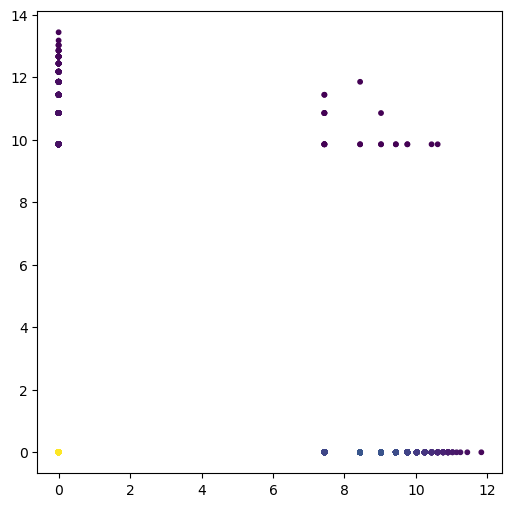

In [21]:
from scipy.stats import gaussian_kde

# Markers
x = cpm_norm["CD4"]
y = cpm_norm["CD8A"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, c=z, s=10)
plt.show()

In [33]:
# Gate cell population
# gated = cpm_norm

gated = cpm_norm[cpm_log2['CD4'] < 1]
gated = gated[gated['CD8A'] > 1]

# Gate sample
# gated = gated[gated['Sample 1'] > 0.0]

gated

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZBED9-AS1,ZFAT-AS1,ZNF474,ZNF479,ZNF625-ZNF20,ZNF727,ZNRF3-AS1,ZNRF3-IT1,Sample_1,Sample_2
Cell_Index,,,,,,,,,,,,,,,,,,,,,
148612,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152892,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
165178,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
174739,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
179714,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303379,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13433484,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13442713,0.0,0.0,0.0,13.287712,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Retain Cell_Index

In [34]:
gated_df_labels = gated.reset_index()

gated_df_labels = gated_df_labels[["Cell_Index"]].copy() 

gated_df_labels

,Cell_Index
0,148612
1,152892
2,165178
3,174739
4,179714
...,...
408,13303379
409,13433484
410,13442713
411,13716116


## TCR contigs import, gated cell label transfer and sorting

In [35]:
df = AIRR
df

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,3091,T_CD4_memory,False,TRB,3091_TRB_1,1506,3,GACGGCAAGACGGCGGAGGAGGAAGGGGGGCTTTTCTTCAAAGCAG...,507,DGKTAEEEGGLFFKAAMGIRLLCRVAFCFLAVGLVDVKVTQSSRYL...,...,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,ATGGACCATGAAAAT,MDHEN,TCATATGATGTTAAAATG,SYDVKM,GCCAGCAGTCTTCAGGCGAGCCCTTATGGCTACACC,ASSLQASPYGYT
1,3517,T_CD4_memory,True,TRA,3517_TRA_1,2206,7,GCGATAGCACCACACAAGAGCATGAAAAATTATGCGTAGGAGGGAG...,603,AIAPHKSMKNYA*EGGGPT*SVYLLQTPMAQELGMQCQARGILQQM...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTCGGGAGTGGGACCAGACTGCTGGTCAGGCCT,FGSGTRLLVRP,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTTCCCGAGGCAAGAGCAGCTATAAATTGATC,ASRGKSSYKLI
2,3517,T_CD4_memory,True,TRB,3517_TRB_1,1822,13,GGCGAGGAGCTATAAATGGCGGAAGCACCACACACGAGCATAGAAG...,573,GEEL*MAEAPHTSIEV*A*EGGGAVVTTLPREGGVRPSRKMLLLLL...,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYIC,TTCGGGCCAGGCACGCGGCTCCTGGTGCTC,FGPGTRLLVL,GACTTTCAGGCCACAACT,DFQATT,TCCAATGAGGGCTCCAAGGCC,SNEGSKA,AGTGCTAGACTGCGGGATGGGGGAGAGACCCAGTAC,SARLRDGGETQY
3,3921,T_CD4_naive,True,TRA,3921_TRA_1,640,6,GAAGTAGGGATGGGGAGATAGGGAGCTGTGATGAGAACAAGAGGTC...,714,SRDGEIGSCDENKRSEHIQTP*GKAFL*PFLKPFKGRDLSSLTCLL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGATCAGGGACCAGACTCAGCATCCGGCCA,WIRDQTQHPA,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGTCCCACCCCTGCACGGAGTACAGCAGTGCTTCCAAGATAATC,AVPPLHGVQQCFQDN
4,3921,T_CD4_naive,True,TRB,3921_TRB_1,250,5,CCGCAAAAACTATTAGGCGTAGTAGGAAGGAGCAGCTCTTCAGAAG...,590,AKTIRRSRKEQLFRSAGKRRMCIETMTSDPDLVKLPSCPDPAMGTR...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTTGGCAGTGGAACCCAGCTCTCTGTCTTG,FGSGTQLSVL,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCTTATCTGGCGGGGACGGGGAACTGTTT,ASSLSGGDGELF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,14040219,B,True,IGH,14040219_IGH_1,818,9,GGGGAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTT...,631,GALREVP*PWIPRHFHLVISTEHRGLTMELGLCWVFLVAILEGVQC...,...,TTCTACGTAGACTCTGTGAAGGGCCGATTCTCCATCTCCAGAGACA...,FYVDSVKGRFSISRDNTKNSLYLQMNSLRAEDTALYYC,TGGGGCCAAGGGACCATCGTCACCGTCTCTTCA,WGQGTIVTVSS,GGATTCAGCGTCAGTAGTTATGAG,GFSVSSYE,ATTGGTACTAGTAGTCATAGCGCA,IGTSSHSA,GCGAGAGAAATGAGGGGGTCTGGGGATGCTTTTGATCTC,AREMRGSGDAFDL
8874,14040219,B,True,IGL,14040219_IGL_1,1250,20,CGAGGACCACCACCAACACTGGTGAAGCAGTATGCGGCCTAGGTAT...,556,RTTTNTGEAVCGLGMGGGHKRQRSRDVSTMAWALLLLTLLTQDTGS...,...,AAGCGGCCCTCAGGGGTTTCTAATCGCTTCTCTGGCTCCAAGTCTG...,KRPSGVSNRFSGSKSGNTASLTISGLQTEDEADYYC,TTCGCAACTGGGACCAAGGTCGCCGTCCTA,FATGTKVAVL,ACCAAAGATATTGGCCTTTATGACACT,TKDIGLYDT,GAGGTCACT,EVT,TGCTCATATGTAGGTAGTGCCACTTATGTC,CSYVGSATYV
8875,14043271,B,True,IGH,14043271_IGH_1,805,6,GGGGATCACATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGG...,590,GSHNNHIPPLKKPLGAQLITMDWTWRFLFVVAAATGVQSQVRLVQS...,...,AACTACGCACAGATGTTCCAGGGCAGAGTCACCATTACCGCGGACA...,NYAQMFQGRVTITADKSTSTAYMELTSLRSEDTAVYYC,TGGCCAAGGGACAATGGTCACCGTCTCTTCA,WPRDNGHRLF,GGAGGCAGCTTCAGCAGTGATCTT,GGSFSSDL,ATCATCCCTCTCTTTCATACAGCA,IIPLFHTA,GCGAGAGTCGGCTTCGTGATTACGTTGGGGGGGTTTAGGGGTGCTT...,ARVGFVITLGGFRGAFDI
8876,14043271,B,True,IGK,14043271_IGK_1,1716,23,CCCTCTCGCAGCCGTCCGAGCGCAGGGCGGACCCCCGCCCCACGAA...,539,PSRSRPSAGRTPAPRSAHTEAE*VGGEELLS*DPEGTMETPAQLLF...,...,AACAGGGCCACTGGCATCCCAGACAGGTTCAGTGGCAGTGGGTCTG...,NRATGIPDRFSGSGSGTDFTLTISRLEPEDFAVYYC,TTCGGCCAAGGGACCAAGGTGGAAATCAAA,FGQGTKVEIK,CAGAGTGTTAGCAGCAGCTAC,QSVSSSY,GGTGCCTCC,GAS,CAGCAGTATGGTAGCTCACCTACGACG,QQYGSSPTT


## Remove Ig Calls

In [36]:
df_TCR = df[df["locus"].str.contains("IGH") == False]
df_TCR = df_TCR[df_TCR["locus"].str.contains("IGK") == False]
df_TCR = df_TCR[df_TCR["locus"].str.contains("IGL") == False]
df_TCR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,3091,T_CD4_memory,False,TRB,3091_TRB_1,1506,3,GACGGCAAGACGGCGGAGGAGGAAGGGGGGCTTTTCTTCAAAGCAG...,507,DGKTAEEEGGLFFKAAMGIRLLCRVAFCFLAVGLVDVKVTQSSRYL...,...,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,ATGGACCATGAAAAT,MDHEN,TCATATGATGTTAAAATG,SYDVKM,GCCAGCAGTCTTCAGGCGAGCCCTTATGGCTACACC,ASSLQASPYGYT
1,3517,T_CD4_memory,True,TRA,3517_TRA_1,2206,7,GCGATAGCACCACACAAGAGCATGAAAAATTATGCGTAGGAGGGAG...,603,AIAPHKSMKNYA*EGGGPT*SVYLLQTPMAQELGMQCQARGILQQM...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTCGGGAGTGGGACCAGACTGCTGGTCAGGCCT,FGSGTRLLVRP,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTTCCCGAGGCAAGAGCAGCTATAAATTGATC,ASRGKSSYKLI
2,3517,T_CD4_memory,True,TRB,3517_TRB_1,1822,13,GGCGAGGAGCTATAAATGGCGGAAGCACCACACACGAGCATAGAAG...,573,GEEL*MAEAPHTSIEV*A*EGGGAVVTTLPREGGVRPSRKMLLLLL...,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYIC,TTCGGGCCAGGCACGCGGCTCCTGGTGCTC,FGPGTRLLVL,GACTTTCAGGCCACAACT,DFQATT,TCCAATGAGGGCTCCAAGGCC,SNEGSKA,AGTGCTAGACTGCGGGATGGGGGAGAGACCCAGTAC,SARLRDGGETQY
3,3921,T_CD4_naive,True,TRA,3921_TRA_1,640,6,GAAGTAGGGATGGGGAGATAGGGAGCTGTGATGAGAACAAGAGGTC...,714,SRDGEIGSCDENKRSEHIQTP*GKAFL*PFLKPFKGRDLSSLTCLL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGATCAGGGACCAGACTCAGCATCCGGCCA,WIRDQTQHPA,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGTCCCACCCCTGCACGGAGTACAGCAGTGCTTCCAAGATAATC,AVPPLHGVQQCFQDN
4,3921,T_CD4_naive,True,TRB,3921_TRB_1,250,5,CCGCAAAAACTATTAGGCGTAGTAGGAAGGAGCAGCTCTTCAGAAG...,590,AKTIRRSRKEQLFRSAGKRRMCIETMTSDPDLVKLPSCPDPAMGTR...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTTGGCAGTGGAACCCAGCTCTCTGTCTTG,FGSGTQLSVL,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCTTATCTGGCGGGGACGGGGAACTGTTT,ASSLSGGDGELF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8864,14032224,T_CD4_naive,True,TRB,14032224_TRB_1,3787,14,GGGGGCTCATGCTCACAGAGGGCCTGGTCTAGAATATTCCACATCT...,534,GGSCSQRAWSRIFHICSHSAMDSWTFCCVSLCILVAKHTDAGVIQS...,...,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYFC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,TCAGGCCACAACTCC,SGHNS,TTTAACAACAACGTTCCG,FNNNVP,GCCAGCAGTTTAACACCGGGACAGGGGCCATTTAACTATGGCTACACC,ASSLTPGQGPFNYGYT
8865,14033716,T_CD4_memory,False,TRB,14033716_TRB_1,3017,2,CCAGGAACCACTTGGGGCGGTGCGAGCTACATGCCATGCACACCAC...,599,QEPLGAVRATCHAHHSHGFVCMRRREGGQTRILPWALPGLPHSAMG...,...,ATTATAAATGAAACAGTTCCAAATCGCTTCTCACCTAAATCTCCAG...,L*MKQFQIASHLNLQTKLT*IFTSIPWSLVTLLCISV,TTTGGCCCAGGCACCCGGCTGACAGTGCTC,WPRHPADSA,CTGGGCCATGATACT,WAMIL,TACAATAATAAGGAGCTC,TIIRSS,GCCAGCAGCCAAGATCGGGCTAGCGGTACACAGATACGCAGTAT,PAAKIGLAVHRYAV
8866,14035652,T_CD8_naive,True,TRA,14035652_TRA_1,8734,13,ACTAATGGCGGGGGAGAAATACGCGTAGTAGGAAGGGCAGCTCTTC...,695,*WRGRNTRSRKGSSSAILIINSCRIQFGI*LVEQPTERLFPALQNM...,...,AAGGAGAAAGAAAGGCTAAAAGCCACATTAACAAAGAAGGAAAGCT...,KEKERLKATLTKKESFLHITAPKPEDSATYLC,TTCGGACAGGGAACGGAGTTATCTGTGAAACCC,FGQGTELSVKP,GTCAGCGGTTTAAGAGGG,VSGLRG,CTGTATTCAGCTGGGGAAGAA,LYSAGEE,GCTGTGCTCGCGGAGGGAGGAAAGCTTATC,AVLAEGGKLI
8867,14035652,T_CD8_naive,True,TRB,14035652_TRB_1,2798,10,GTAGAACGAATGGGGGGAAGAGGTGGAGACGTTACAGAAACCACCT...,538,*NEWGEEVETLQKPPGAPRTGRHLPDAAMGPQLLGYVVLCLLGAGP...,...,ACTGATAAGGGAGATGTTCCTGAAGGGTACAAAGTCTCTCGAAAAG...,TDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFC,TTTGGGAACGGGACCAGGCTCACTGTGACA,FGNGTRLTVT,ATGAACCATGAGTAT,MNHEY,TCAATGAATGTTGAGGTG,SMNVEV,GCCAGCAGTTTATGGGGCTCACCCCTCCAC,ASSLWGSPLH


## Pick productive loci

In [37]:
productive_df= df_TCR.loc[df_TCR['productive']==True]
productive_df

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,3091,T_CD4_memory,False,TRB,3091_TRB_1,1506,3,GACGGCAAGACGGCGGAGGAGGAAGGGGGGCTTTTCTTCAAAGCAG...,507,DGKTAEEEGGLFFKAAMGIRLLCRVAFCFLAVGLVDVKVTQSSRYL...,...,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,ATGGACCATGAAAAT,MDHEN,TCATATGATGTTAAAATG,SYDVKM,GCCAGCAGTCTTCAGGCGAGCCCTTATGGCTACACC,ASSLQASPYGYT
1,3517,T_CD4_memory,True,TRA,3517_TRA_1,2206,7,GCGATAGCACCACACAAGAGCATGAAAAATTATGCGTAGGAGGGAG...,603,AIAPHKSMKNYA*EGGGPT*SVYLLQTPMAQELGMQCQARGILQQM...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTCGGGAGTGGGACCAGACTGCTGGTCAGGCCT,FGSGTRLLVRP,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTTCCCGAGGCAAGAGCAGCTATAAATTGATC,ASRGKSSYKLI
2,3517,T_CD4_memory,True,TRB,3517_TRB_1,1822,13,GGCGAGGAGCTATAAATGGCGGAAGCACCACACACGAGCATAGAAG...,573,GEEL*MAEAPHTSIEV*A*EGGGAVVTTLPREGGVRPSRKMLLLLL...,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYIC,TTCGGGCCAGGCACGCGGCTCCTGGTGCTC,FGPGTRLLVL,GACTTTCAGGCCACAACT,DFQATT,TCCAATGAGGGCTCCAAGGCC,SNEGSKA,AGTGCTAGACTGCGGGATGGGGGAGAGACCCAGTAC,SARLRDGGETQY
4,3921,T_CD4_naive,True,TRB,3921_TRB_1,250,5,CCGCAAAAACTATTAGGCGTAGTAGGAAGGAGCAGCTCTTCAGAAG...,590,AKTIRRSRKEQLFRSAGKRRMCIETMTSDPDLVKLPSCPDPAMGTR...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTTGGCAGTGGAACCCAGCTCTCTGTCTTG,FGSGTQLSVL,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCTTATCTGGCGGGGACGGGGAACTGTTT,ASSLSGGDGELF
5,4283,T_CD4_naive,False,TRB,4283_TRB_4,237,2,GGGGGATCTGGTAAAGCTCCCATCCTGCCCTGACCCTGCCATGGGC...,500,GDLVKLPSCPDPAMGTRLLFWVAFCLLGADHTGAGVSQSPSNKVTE...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCTTAGAGGGACAGGGGTCCTCAGGCCAGTAC,ASSLEGQGSSGQY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8861,14026446,T_CD8_naive,True,TRB,14026446_TRB_1,1482,6,GAGAGGGGAAGAGGCGAAGGAGGGATGGGGGGAGAGATGAGATCCT...,478,RGEEAKEGWGER*DPGLDLKWAQGHMDAGITQSPRHKVTETGTPVT...,...,ACTGACAAAGGAGAAGTCTCAGATGGCTATAGTGTCTCTAGATCAA...,TDKGEVSDGYSVSRSKTEDFLLTLESATSSQTSVYFC,TTTGGCCCAGGCACCCGGCTGACAGTGCTC,FGPGTRLTVL,GAGAACCACCGCTAT,ENHRY,TCATATGGTGTTAAAGAT,SYGVKD,GCCACTTGGGATCGCGCCCTGGATACGCAGTAT,ATWDRALDTQY
8864,14032224,T_CD4_naive,True,TRB,14032224_TRB_1,3787,14,GGGGGCTCATGCTCACAGAGGGCCTGGTCTAGAATATTCCACATCT...,534,GGSCSQRAWSRIFHICSHSAMDSWTFCCVSLCILVAKHTDAGVIQS...,...,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYFC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,TCAGGCCACAACTCC,SGHNS,TTTAACAACAACGTTCCG,FNNNVP,GCCAGCAGTTTAACACCGGGACAGGGGCCATTTAACTATGGCTACACC,ASSLTPGQGPFNYGYT
8866,14035652,T_CD8_naive,True,TRA,14035652_TRA_1,8734,13,ACTAATGGCGGGGGAGAAATACGCGTAGTAGGAAGGGCAGCTCTTC...,695,*WRGRNTRSRKGSSSAILIINSCRIQFGI*LVEQPTERLFPALQNM...,...,AAGGAGAAAGAAAGGCTAAAAGCCACATTAACAAAGAAGGAAAGCT...,KEKERLKATLTKKESFLHITAPKPEDSATYLC,TTCGGACAGGGAACGGAGTTATCTGTGAAACCC,FGQGTELSVKP,GTCAGCGGTTTAAGAGGG,VSGLRG,CTGTATTCAGCTGGGGAAGAA,LYSAGEE,GCTGTGCTCGCGGAGGGAGGAAAGCTTATC,AVLAEGGKLI
8867,14035652,T_CD8_naive,True,TRB,14035652_TRB_1,2798,10,GTAGAACGAATGGGGGGAAGAGGTGGAGACGTTACAGAAACCACCT...,538,*NEWGEEVETLQKPPGAPRTGRHLPDAAMGPQLLGYVVLCLLGAGP...,...,ACTGATAAGGGAGATGTTCCTGAAGGGTACAAAGTCTCTCGAAAAG...,TDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFC,TTTGGGAACGGGACCAGGCTCACTGTGACA,FGNGTRLTVT,ATGAACCATGAGTAT,MNHEY,TCAATGAATGTTGAGGTG,SMNVEV,GCCAGCAGTTTATGGGGCTCACCCCTCCAC,ASSLWGSPLH


## Sort by locus

In [38]:
productive_df.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
productive_df

/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_83644/2107215793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productive_df.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)


,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
4355,6933159,T_CD4_memory,True,TRA,6933159_TRA_1,378,4,ATGGGGAAGTCAACTTCTGGGAGCAGATCTCTGCAGAATAAAAATG...,541,WGSQLLGADLCRIKMKKHLTTFLVILWLYFYRGNGKNQVEQSPQSL...,...,AAGTCGAACGGAAGATATACAGCAACTCTGGATGCAGACACAAAGC...,KSNGRYTATLDADTKQSSLHITASQLSDSASYIC,TTTGGGACAGGCACTCAGCTAAAAGTGGAACTC,FGTGTQLKVEL,GTGAGCCCCTTCAGCAAC,VSPFSN,ATGACTTTCAGTGAGAACACA,MTFSENT,GTGGTGAGCCCCGCTATACTCACGGGAGGAGGAAACAAACTCACC,VVSPAILTGGGNKLT
3176,4749757,T_CD8_memory,True,TRA,4749757_TRA_1,4609,15,CCAAAGGGCATAGACGTTTTGCGGTAGTAGGAAGGGGGAGAGTGTT...,594,PKGIDVLR**EGGECLSCEPFSIFQI*DFSSQ*V*VTEGMETLLGL...,...,CAAACAAGTGGAAGACTTAATGCCTCGCTGGATAAATCATCAGGAC...,QTSGRLNASLDKSSGRSTLYIAASQPGDSATYLC,TTTGGAGGGGGAACAAGGTTAATGGTCAAACCC,FGGGTRLMVKP,GATAGCGCTATTTACAAC,DSAIYN,ATTCAGTCAAGTCAGAGAGAG,IQSSQRE,GCTGTTCTTAATGCAGGCAACATGCTCACC,AVLNAGNMLT
6852,10935976,T_CD4_memory,True,TRA,10935976_TRA_1,2015,5,CCCCGAGCACCAGAAAACCCACCCCACAACCCCACCACGACGCACT...,731,PSTRKPTPQPHHDALPSSRKHKERSPETRQ*TTLA*LNLCGGGLGG...,...,AAAGAAGATGGAAGGTTTACAGCACAGCTCAATAAAGCCAGCCAGT...,KEDGRFTAQLNKASQYVSLLIRDSQPSDSATYLC,TTTGGAGCAGGAACAAGACTATTTGTTAAAGCA,FGAGTRLFVKA,GACCGAGGTTCCCAGTCC,DRGSQS,ATATACTCCAATGGTGAC,IYSNGD,GCCGTGAGTGGTGGAGGCTTCAAAACTATC,AVSGGGFKTI
3192,4753618,T_CD4_memory,True,TRA,4753618_TRA_1,1089,2,GTCACATTGCAAATGGAGTGCGAACCACGGTTGGACAAGAGGTCTT...,418,SHCKWSANHGWTRGLKRSREGGVSVYLFWYVQYPNQGLQLLLKYLS...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAACAAGAGTCAAACTT...,KGINGFEAEFNKSQTSFHLRKPSVHISDTAEYFC,TTTGGGAGTGGAACAAGACTCCAAGTGCAACCA,FGSGTRLQVQP,GGGGGGGTTTCAGTGTAT,GGVSVY,TATTTATCAGGATCCACCCTGGTT,YLSGSTLV,GCTGTGAGTATTCTCATGGACACGGGCAGGAGAGCACTTACT,AVSILMDTGRRALT
3202,4867226,T_CD4_naive,True,TRA,4867226_TRA_1,4333,9,CACCACCTATTAGCCAACACTTTTATGCGTAGGAGGGATAGGGGAG...,641,PPISQHFYA*EG*GRTDSFYDS*SGRNKVSLLCSFLFGLKILILSE...,...,GAAGATGGAAGGTTTACAGCACAGCTCAATAGAGCCAGCCAGTATA...,EDGRFTAQLNRASQYISLLIRDSKLSDSATYLC,TTCGGGAGTGGGACCAGACTGCTGGTCAGGCCT,FGSGTRLLVRP,AACAGTGCTTCTCAGTCT,NSASQS,GTATACTCCAGTGGTAAT,VYSSGN,GTGGTGAACATGAAGGATAGCAGCTATAAATTGATC,VVNMKDSSYKLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,745768,T_gamma_delta,True,TRG,745768_TRG_1,256,1,CCCCGAGCCGATCCCCACAAACGGCAAAGGCAGGTGGCGAAACGGA...,669,PEPIPTNGKGRWRNGSKATHPR*PKTSNAEEVRGPVSQETSSSYCL...,...,GTGTTGGAATCAGGACTCAGTCCAGGAAAGTATTATGCTCATACAC...,VLESGLSPGKYYAHTPRRWSWILRLQNLIENDSGVYYC,TTTGGCAGTGGAACAACACTTGTTGTCACA,FGSGTTLVVT,GTAACAAATACCTTCTAC,VTNTFY,TATGACGTCTCCACCGCAAGGGAT,YDVSTARD,GCCACCTGGGACACCTATAATTATTATAAGAAACTC,ATWDTYNYYKKL
5768,9294016,T_gamma_delta,True,TRG,9294016_TRG_1,233,1,CAACTCATGGTGCGTAGCCAGCACAAAGAAGCTACTACCACAATAA...,729,THGA*PAQRSYYHNKQIVLKRSRDGGDLAGLSSHRLEVLTGGEDTA...,...,AGAAAGGAATCCGGCATTCCGTCAGGCAAATTTGAGGTGGATAGGA...,RKESGIPSGKFEVDRIPETSTSTLTIHNVEKQDIATYYC,TTTGGTCCCGGAACAAAGCTTATCATTACA,FGPGTKLIIT,GGAATAACAATTTCTGCAACATCT,GITISATS,ATTTCATATGACGGCACTGTC,ISYDGTV,GCCTTGTGGGAGGTGCCCGAGTTGGGCAAAAAAATCAAGGTA,ALWEVPELGKKIKV
8428,13301387,T_gamma_delta,True,TRG,13301387_TRG_1,66,3,GGAATGGGGAGTCACTTCTCTCTGCCTGTGTCTCAGGAAACCAGCT...,598,GMGSHFSLPVSQETSSSYCLLC*GSLPC*VGPEF*EDLLLLFIWSV...,...,GTGTTGGAATCAGGACTCAGTCCAGGAAAGTATTATACTCATACAC...,VLESGLSPGKYYTHTPRRWSWILRLQNLIENDSGVYYC,TTTGGCAGTGGAACAACACTTGTTGTCACA,FGSGTTLVVT,GTAACAAATACCTTCTAC,VTNTFY,TATGACGTCTCCACCGCAAGGGAT,YDVSTARD,GCCACCTGGGACACCTATAATTATTATAAGAAACTC,ATWDTYNYYKKL
4049,6359496,T_gamma_delta,True,TRG,6359496_TRG_1,1468,9,AAGGGATGGGGGACTTCTCTCTGCCTGTGTCTCAGGAAACCAGCTC...,597,GMGDFSLPVSQETSSSYCLLC*GSLPC*VGPEF*EDLLLLFIWSVS...,...,GTGTTGGAATCAGGACTCAGTCCAGGAAAGTATTATACTCATACAC...,VLESGLSPGKYYTHTPRRWSWILRLQNLIENDSGVYYC,TTTGGCAGTGGAACAACACTTGTTGTCACA,FGSGTTLVVT,GTAACAAATACCTTCTAC,VTNTFY,TATGACGTCTCCACCGCAAGGGAT,YDVSTARD,GCCACCTGGGACACCTATAATTATTATAAGAAACTC,ATWDTYNYYKKL


## Subset colums of interest from the main df

In [39]:
df_sort = productive_df[["cell_id", 'locus', 'sequence_aa', 'v_call', 'j_call']].copy() 

df_sort = df_sort[df_TCR["locus"].str.contains("TRG") == False]
df_sort = df_sort[df_TCR["locus"].str.contains("TRD") == False]

df_sort['sequence_aa'] = df_sort['sequence_aa'].apply(lambda x: x.rsplit('*', maxsplit=1)[-1])

df_sort['sequence_aa'] = df_sort['sequence_aa'].str.replace('^.*?[M]','M', regex=True)


df_sort['sequence_aa'] = df_sort['sequence_aa'].str.replace('^.*?[C]','C', regex=True)

df_sort['sequence_aa'] = df_sort['sequence_aa'].apply(lambda x: x.rsplit('F', maxsplit=1)[0] + 'F') 

df_sort = df_sort[df_sort['sequence_aa'].str.contains("C") == True]
df_sort = df_sort[df_sort['sequence_aa'].str.contains("F") == True]
df_sort = df_sort[df_sort['sequence_aa'].str.contains("CF") == False]

df_sort = df_sort.rename(columns={'cell_id': 'Cell_Index'})

df_sort.sort_values(by = 'Cell_Index', axis=0, ascending=True, inplace=True)

# df_sort.head(10)
df_sort

# df_sort.to_csv("df_sort_last_F.csv")

/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_83644/23877731.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sort = df_sort[df_TCR["locus"].str.contains("TRG") == False]
/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_83644/23877731.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sort = df_sort[df_TCR["locus"].str.contains("TRD") == False]


,Cell_Index,locus,sequence_aa,v_call,j_call
2,3517,TRB,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRBV20-1*01,TRBJ2-5*01
1,3517,TRA,CQARGILQQMWGVFLLYVSMKMEGTTGQNIDQPTEMTATEGAIVQI...,TRAV1-2*01,TRAJ12*01
4,3921,TRB,CIETMTSDPDLVKLPSCPDPAMGTRLLFWVAFCLLGADHTGAGVSQ...,TRBV7-2*01,TRBJ1-4*01
5,4283,TRB,CLLGADHTGAGVSQSPSNKVTEKGKDVELRCDPISGHTALYWYRQS...,TRBV7-2*01,TRBJ2-7*01
19,6221,TRA,CTYSVSGNPYLFWYVQYPNRGLQFLLKYITGDNLVKGSYGFEAEFN...,TRAV3*01,TRAJ13*02
...,...,...,...,...,...
8861,14026446,TRB,CHQTENHRYMYWYRQDPGHGLRLIHYSYGVKDTDKGEVSDGYSVSR...,TRBV10-3*02,TRBJ2-3*01
8864,14032224,TRB,CCVSLCILVAKHTDAGVIQSPRHEVTEMGQEVTLRCKPISGHNSLF...,TRBV12-3*01,TRBJ1-2*01
8866,14035652,TRA,CAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLR...,TRAV20*02,TRAJ23*01
8867,14035652,TRB,CLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQD...,TRBV27*01,TRBJ1-6*02


## Pick TRA

In [40]:
df_sort_A = df_sort[df_sort["locus"].str.contains("TRB") == False]

df_sort_A = df_sort_A.drop(['locus'], axis=1)

df_sort_A.set_index(['Cell_Index'], inplace=True)

df_sort_A.columns = ['TRA', 'TRAV', 'TRAJ']

df_sort_A

,TRA,TRAV,TRAJ
Cell_Index,,,
3517,CQARGILQQMWGVFLLYVSMKMEGTTGQNIDQPTEMTATEGAIVQI...,TRAV1-2*01,TRAJ12*01
6221,CTYSVSGNPYLFWYVQYPNRGLQFLLKYITGDNLVKGSYGFEAEFN...,TRAV3*01,TRAJ13*02
6620,CTYDTSDPSYGLFWYKQPSSGEMIFLIYQGSYDQQNATEGRYSLNF...,TRAV14/DV4*01,TRAJ37*02
8532,CWVSGQQKEKSDQQQVKQSPQSLIVQKGGISIINCAYENTAFDYFP...,TRAV23/DV6*01,TRAJ12*01
8926,CTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRAS...,TRAV12-1*01,TRAJ6*01
...,...,...,...
13896964,CSYTVSGLRGLVWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTK...,TRAV20*02,TRAJ32*02
14009857,CAVGPSSGGSYIPTFGRGTSLIVHPYIQNPDPAVYQLRDSKSSDKS...,TRAV8-3*02,TRAJ6*01
14013725,CTSSSIFNTWLWYKQDPGEGPVLLIALYKAGELTSNGRLTAQFGIT...,TRAV35*01,TRAJ42*01


## Pick TRB

In [41]:
df_sort_B = df_sort[df_sort["locus"].str.contains("TRA") == False]

df_sort_B = df_sort_B.drop(['locus'], axis=1)

df_sort_B.set_index(['Cell_Index'], inplace=True)

df_sort_B.columns = ['TRB', 'TRBV', 'TRBJ']

df_sort_B

,TRB,TRBV,TRBJ
Cell_Index,,,
3517,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRBV20-1*01,TRBJ2-5*01
3921,CIETMTSDPDLVKLPSCPDPAMGTRLLFWVAFCLLGADHTGAGVSQ...,TRBV7-2*01,TRBJ1-4*01
4283,CLLGADHTGAGVSQSPSNKVTEKGKDVELRCDPISGHTALYWYRQS...,TRBV7-2*01,TRBJ2-7*01
6221,CPDPAMGTRLLFWVAFCLLGADHTGAGVSQSPSNKVTEKGKDVELR...,TRBV7-2*01,TRBJ1-4*01
6620,CYMGFYFLGAGLMEADIYQTPRYLVIGTGKKITLECSQTMGHDKMY...,TRBV25-1*01,TRBJ1-4*01
...,...,...,...
14023320,CCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMS...,TRBV6-5*01,TRBJ1-6*02
14026446,CHQTENHRYMYWYRQDPGHGLRLIHYSYGVKDTDKGEVSDGYSVSR...,TRBV10-3*02,TRBJ2-3*01
14032224,CCVSLCILVAKHTDAGVIQSPRHEVTEMGQEVTLRCKPISGHNSLF...,TRBV12-3*01,TRBJ1-2*01


## Merge TRA and TRB for single cells - locus_aaseq column

In [42]:
df_AB = pd.merge(df_sort_A, df_sort_B, left_index=True, right_index=True)

df_AB.reset_index(inplace=True)

df_AB

,Cell_Index,TRA,TRAV,TRAJ,TRB,TRBV,TRBJ
0,3517,CQARGILQQMWGVFLLYVSMKMEGTTGQNIDQPTEMTATEGAIVQI...,TRAV1-2*01,TRAJ12*01,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRBV20-1*01,TRBJ2-5*01
1,6221,CTYSVSGNPYLFWYVQYPNRGLQFLLKYITGDNLVKGSYGFEAEFN...,TRAV3*01,TRAJ13*02,CPDPAMGTRLLFWVAFCLLGADHTGAGVSQSPSNKVTEKGKDVELR...,TRBV7-2*01,TRBJ1-4*01
2,6620,CTYDTSDPSYGLFWYKQPSSGEMIFLIYQGSYDQQNATEGRYSLNF...,TRAV14/DV4*01,TRAJ37*02,CYMGFYFLGAGLMEADIYQTPRYLVIGTGKKITLECSQTMGHDKMY...,TRBV25-1*01,TRBJ1-4*01
3,8926,CTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRAS...,TRAV12-1*01,TRAJ6*01,CWAALCLLGADHTGAGVSQTPSNKVTEKGKYVELRCDPISGHTALY...,TRBV7-3*01,TRBJ2-3*01
4,15773,CLESGMAQTVTQSQPEMSVQEAETVTLSCTYDTSENNYYLFWYKQP...,TRAV38-1*01,TRAJ33*01,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRBV20-1*01,TRBJ2-5*01
...,...,...,...,...,...,...,...
591,13874004,CVYETRDTTYYLFWYKQPPSGELVFLIRRNSFDEQNEISGRYSWNF...,TRAV19*01,TRAJ27*01,CLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQD...,TRBV27*01,TRBJ2-5*01
592,13892818,CPGFLWALVISTCLEFSMAQTVTQSQPEMSVQEAETVTLSCTYDTS...,TRAV38-2/DV8*01,TRAJ56*01,CCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMS...,TRBV6-5*01,TRBJ2-7*01
593,13896964,CSYTVSGLRGLVWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTK...,TRAV20*02,TRAJ32*02,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRBV20-1*01,TRBJ2-7*01
594,14023320,CTYDTSDPSYGLFWYKQPSSGEMIFLIYQGSYDQQNATEGRYSLNF...,TRAV14/DV4*01,TRAJ29*01,CCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMS...,TRBV6-5*01,TRBJ1-6*02


## Gated cell label transfer - AB TCR

In [43]:
df_pre_ERGO = pd.merge(gated_df_labels, df_AB)

df_pre_ERGO.set_index(['Cell_Index'], inplace=True)

df_pre_ERGO = df_pre_ERGO[['TRA', 'TRB', 'TRAV', 'TRAJ', 'TRBV', 'TRBJ']]

df_pre_ERGO[['TRAV', 'TRAJ', 'TRBV', 'TRBJ']] = df_pre_ERGO[['TRAV', 'TRAJ', 'TRBV', 'TRBJ']].replace('[*].*','', regex=True)
df_pre_ERGO[['TRAV', 'TRAJ', 'TRBV', 'TRBJ']] = df_pre_ERGO[['TRAV', 'TRAJ', 'TRBV', 'TRBJ']].replace('/','', regex=True)

df_pre_ERGO

,TRA,TRB,TRAV,TRAJ,TRBV,TRBJ
Cell_Index,,,,,,
148612,CAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLR...,CLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQD...,TRAV20,TRAJ23,TRBV27,TRBJ1-6
165178,CTYSVSGNPYLFWYVQYPNRGLQFLLKYITGDNLVKGSYGFEAEFN...,CAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSR...,TRAV3,TRAJ40,TRBV6-5,TRBJ1-2
302240,CTSSSIFNTWLWYKQDPGEGPVLLIALYKAGELTSNGRLTAQFGIT...,CASSPPAGFDYGYTFGSGTRLTVVEDLNKVFPPEVAVF,TRAV35,TRAJ30,TRBV7-9,TRBJ1-2
615570,CTYSDRVSQSFFWYRQYSGKSPELIMSIYSNGDKEDGRFTAQLNKA...,CRLLCCAVLCLLGAVPMETGVTQTPRHLVMGMTNKKSLKCEQHLGH...,TRAV12-2,TRAJ37,TRBV4-2,TRBJ1-1
897801,CRSLLLVPAFQVIFTLGGTRAQSVTQLDSQVPVFEEAPVELRCNYS...,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRAV8-6,TRAJ28,TRBV20-1,TRBJ2-5
...,...,...,...,...,...,...
12693525,CAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLR...,CLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQD...,TRAV20,TRAJ23,TRBV27,TRBJ1-6
13140525,CLESGMAQTVTQSQPEMSVQEAETVTLSCTYDTSENNYYLFWYKQP...,CASSEGLAGVGRTDTQYFGPGTRLTVLEDLKNVFPPEVAVF,TRAV38-1,TRAJ34,TRBV7-7,TRBJ2-3
13297553,CTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRAS...,CCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMS...,TRAV12-1,TRAJ41,TRBV6-5,TRBJ2-3


## Add peptide, T-cell type and MHC information

In [44]:
df_ERGO = df_pre_ERGO

# Cell type

# df_ERGO['T-Cell-Type'] = ""
# df_ERGO['T-Cell-Type'] = "CD4"
df_ERGO['T-Cell-Type'] = "CD8"

# Peptide

# df_ERGO['Peptide'] = "KVAELVHFL" # MAGE-A3
# df_ERGO['Peptide'] = "KIFGSLAFL" # HER2-neu

# MHC

df_ERGO['MHC'] = "HLA-A*02"

df_ERGO

,TRA,TRB,TRAV,TRAJ,TRBV,TRBJ,T-Cell-Type,MHC
Cell_Index,,,,,,,,
148612,CAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLR...,CLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQD...,TRAV20,TRAJ23,TRBV27,TRBJ1-6,CD8,HLA-A*02
165178,CTYSVSGNPYLFWYVQYPNRGLQFLLKYITGDNLVKGSYGFEAEFN...,CAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSR...,TRAV3,TRAJ40,TRBV6-5,TRBJ1-2,CD8,HLA-A*02
302240,CTSSSIFNTWLWYKQDPGEGPVLLIALYKAGELTSNGRLTAQFGIT...,CASSPPAGFDYGYTFGSGTRLTVVEDLNKVFPPEVAVF,TRAV35,TRAJ30,TRBV7-9,TRBJ1-2,CD8,HLA-A*02
615570,CTYSDRVSQSFFWYRQYSGKSPELIMSIYSNGDKEDGRFTAQLNKA...,CRLLCCAVLCLLGAVPMETGVTQTPRHLVMGMTNKKSLKCEQHLGH...,TRAV12-2,TRAJ37,TRBV4-2,TRBJ1-1,CD8,HLA-A*02
897801,CRSLLLVPAFQVIFTLGGTRAQSVTQLDSQVPVFEEAPVELRCNYS...,CKSGTSVKIECRSLDFQATTMFWYRQFPKQSLMLMATSNEGSKATY...,TRAV8-6,TRAJ28,TRBV20-1,TRBJ2-5,CD8,HLA-A*02
...,...,...,...,...,...,...,...,...
12693525,CAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLR...,CLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQD...,TRAV20,TRAJ23,TRBV27,TRBJ1-6,CD8,HLA-A*02
13140525,CLESGMAQTVTQSQPEMSVQEAETVTLSCTYDTSENNYYLFWYKQP...,CASSEGLAGVGRTDTQYFGPGTRLTVLEDLKNVFPPEVAVF,TRAV38-1,TRAJ34,TRBV7-7,TRBJ2-3,CD8,HLA-A*02
13297553,CTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRAS...,CCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMS...,TRAV12-1,TRAJ41,TRBV6-5,TRBJ2-3,CD8,HLA-A*02


## Share AB clonotypes for ERGO-II

In [45]:
# df_ERGO = df_ERGO.reset_index(drop=True)
# df_ERGO

df_ERGO.to_csv("AB TCR pre-ERGO-II.csv")